# For Text Mining assignment
 
 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining


In [1]:
import re
import nltk
import spacy
import string
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from selectorlib import Extractor
import requests
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [84]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/dp/B085FY9NK8/ref=s9_acsd_al_bw_c2_x_2_t?pf_rd_m=A1K21FY43GMZF8&pf_rd_s=merchandised-search-4&pf_rd_r=3QRCEMA6TYHMV5MWD30A&pf_rd_t=101&pf_rd_p=60fd9c72-a2f4-4ca4-bed6-fd23567c761f&pf_rd_i=14156834031',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [85]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [86]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [89]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/All-new-Echo/product-reviews/B085FY9NK8/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews{x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [145]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nNot a great experience.,4.0,"The package looked like reused, worn out or re...",Reviewed in India on 30 September 2023
1,4.0 out of 5 stars\nMusic,4.0,Good sound and quality,Reviewed in India on 23 September 2023
2,5.0 out of 5 stars\nExcellent Voice Recognitio...,5.0,Excellent Voice Recognition and Smartness! got...,Reviewed in India on 15 October 2023
3,4.0 out of 5 stars\nDoes its job and does it w...,4.0,"Wanted to purchase this for a long time, but t...",Reviewed in India on 22 July 2023
4,5.0 out of 5 stars\nSpectacular sound,5.0,Powerful bass and produces lower frequency as ...,Reviewed in India on 8 October 2023
...,...,...,...,...
565,5.0 out of 5 stars\nVery balanced sound,5.0,I like iys sound quality. Thanku amazon. Kids ...,Reviewed in India on 10 October 2023
566,"5.0 out of 5 stars\nSounds Amazing, Decent bas...",5.0,I haven't explored completely for me this devi...,Reviewed in India on 28 August 2023
567,5.0 out of 5 stars\nProduct is good,5.0,Voice is good like a Dolby digital. Wifi conne...,Reviewed in India on 2 October 2023
568,5.0 out of 5 stars\nA Game-Changer: Amazon Ech...,5.0,Review:The Amazon Echo 4th Gen has truly revol...,Reviewed in India on 17 July 2023


In [146]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)
df

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nNot a great experience.,4.0,"The package looked like reused, worn out or re...",30 September 2023
1,4.0 out of 5 stars\nMusic,4.0,Good sound and quality,23 September 2023
2,5.0 out of 5 stars\nExcellent Voice Recognitio...,5.0,Excellent Voice Recognition and Smartness! got...,15 October 2023
3,4.0 out of 5 stars\nDoes its job and does it w...,4.0,"Wanted to purchase this for a long time, but t...",22 July 2023
4,5.0 out of 5 stars\nSpectacular sound,5.0,Powerful bass and produces lower frequency as ...,8 October 2023
...,...,...,...,...
565,5.0 out of 5 stars\nVery balanced sound,5.0,I like iys sound quality. Thanku amazon. Kids ...,10 October 2023
566,"5.0 out of 5 stars\nSounds Amazing, Decent bas...",5.0,I haven't explored completely for me this devi...,28 August 2023
567,5.0 out of 5 stars\nProduct is good,5.0,Voice is good like a Dolby digital. Wifi conne...,2 October 2023
568,5.0 out of 5 stars\nA Game-Changer: Amazon Ech...,5.0,Review:The Amazon Echo 4th Gen has truly revol...,17 July 2023


In [147]:
# Saving into CSV file

df.to_csv("EchoSpeaker_Review.csv")

In [148]:
# Load Dataset

reviews=pd.read_csv('EchoSpeaker_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nNot a great experience.,4.0,"The package looked like reused, worn out or re...",30 September 2023
1,4.0 out of 5 stars\nMusic,4.0,Good sound and quality,23 September 2023
2,5.0 out of 5 stars\nExcellent Voice Recognitio...,5.0,Excellent Voice Recognition and Smartness! got...,15 October 2023
3,4.0 out of 5 stars\nDoes its job and does it w...,4.0,"Wanted to purchase this for a long time, but t...",22 July 2023
4,5.0 out of 5 stars\nSpectacular sound,5.0,Powerful bass and produces lower frequency as ...,8 October 2023
...,...,...,...,...
565,5.0 out of 5 stars\nVery balanced sound,5.0,I like iys sound quality. Thanku amazon. Kids ...,10 October 2023
566,"5.0 out of 5 stars\nSounds Amazing, Decent bas...",5.0,I haven't explored completely for me this devi...,28 August 2023
567,5.0 out of 5 stars\nProduct is good,5.0,Voice is good like a Dolby digital. Wifi conne...,2 October 2023
568,5.0 out of 5 stars\nA Game-Changer: Amazon Ech...,5.0,Review:The Amazon Echo 4th Gen has truly revol...,17 July 2023


# Data Exploration

In [149]:
reviews.Rating.describe()

count    570.00000
mean       4.70000
std        0.45866
min        4.00000
25%        4.00000
50%        5.00000
75%        5.00000
max        5.00000
Name: Rating, dtype: float64

In [150]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        570 non-null    object 
 1   Rating       570 non-null    float64
 2   Review       570 non-null    object 
 3   Review_Date  570 non-null    object 
dtypes: float64(1), object(3)
memory usage: 17.9+ KB


In [151]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

# Data Visualization

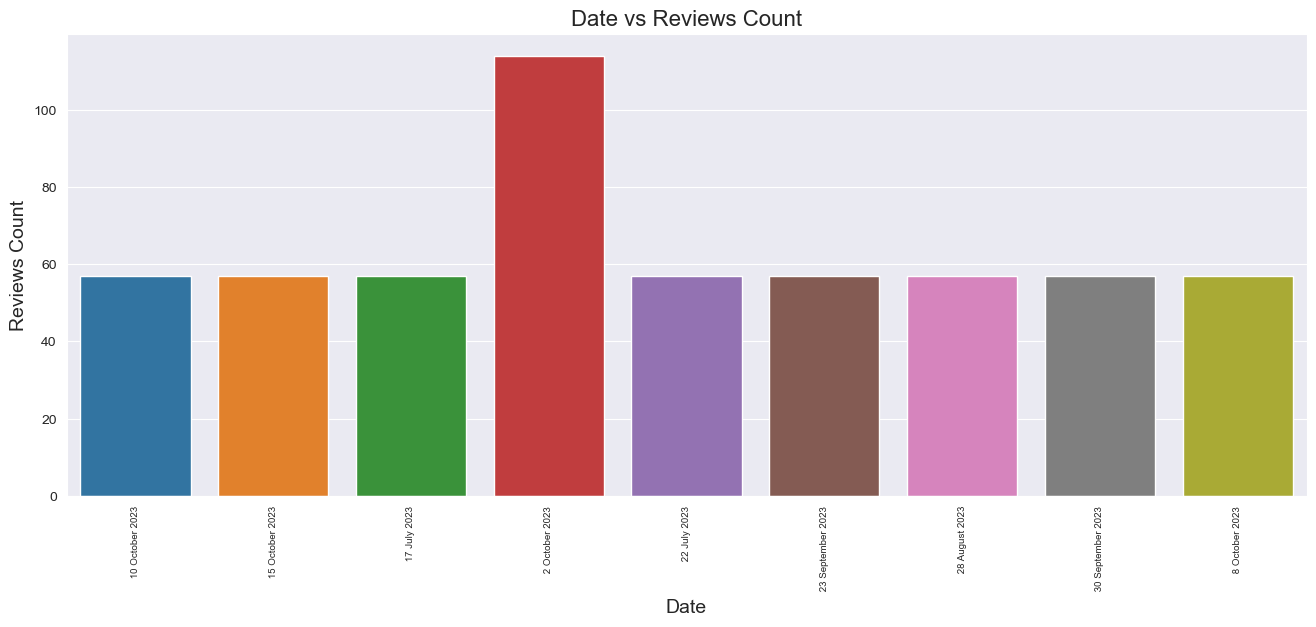

In [152]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

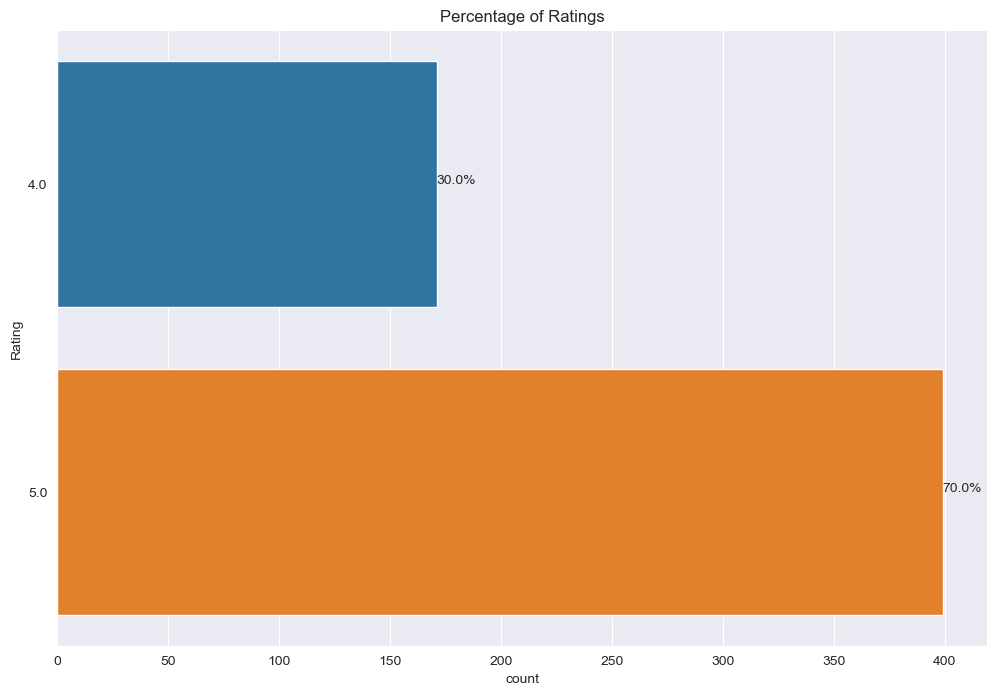

In [153]:
# Percentage of Ratings

plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [154]:
#Checking and Correction of Spelling

reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    The package looked like refused, worn out or r...
1                               Good sound and quality
2    Excellent Voice Recognition and Smartness! got...
3    Wanted to purchase this for a long time, but t...
4    Powerful bass and produces lower frequency as ...
Name: Review, dtype: object

In [155]:
EchoSpeaker=reviews[['Review']]
EchoSpeaker

,Review
0,"The package looked like reused, worn out or re..."
1,Good sound and quality
2,Excellent Voice Recognition and Smartness! got...
3,"Wanted to purchase this for a long time, but t..."
4,Powerful bass and produces lower frequency as ...
...,...
565,I like iys sound quality. Thanku amazon. Kids ...
566,I haven't explored completely for me this devi...
567,Voice is good like a Dolby digital. Wifi conne...
568,Review:The Amazon Echo 4th Gen has truly revol...


In [156]:
Canon_review.reset_index(drop=True, inplace=True)
stop_words = stopwords.words('english')
EchoSpeaker['Review'] = EchoSpeaker['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

In [157]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(Canon_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", EchoSpeaker["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  0%|          | 0/570 [00:00<?, ?it/s]

In [158]:
# Cleaning the text by removing irrelevant information

def clean_text(text):
  text=text.lower()
  text=re.sub('\[.*?\]','',text)
  text= re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub("[0-9" "]+"," ",text)
  text = re.sub('[‘’“”…]', '', text)
  return text

clean = lambda x: clean_text(x)

EchoSpeaker["Review"] = EchoSpeaker["Review"].apply(clean_text) # Clean The Text
EchoSpeaker

,Review
0,the package looked like reused worn refurbishe...
1,good sound quality
2,excellent voice recognition smartness got ama...
3,wanted purchase long time reviews regarding al...
4,powerful bass produces lower frequency well ve...
...,...
565,i like iys sound quality thanku amazon kids al...
566,i explored completely device like alexa device...
567,voice good like dolby digital wifi connectivit...
568,reviewthe amazon echo gen truly revolutionize...


In [159]:
freq = pd.Series(' '.join(EchoSpeaker['Review']).split()).value_counts()[:20] # for top 20
freq

i             684
echo          456
sound         399
like          399
device        342
amazon        285
alexa         285
voice         285
quality       285
the           285
smart         285
good          228
gen           228
alexas        171
truly         171
home          171
also          171
speaker       114
seamlessly    114
one           114
Name: count, dtype: int64

In [160]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
EchoSpeaker['Review'] = EchoSpeaker['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [161]:
#Word Frequency after Removal of Stopwords

freq_stp = pd.Series(' '.join(EchoSpeaker['Review']).split()).value_counts()[:20] # for top 20
freq_stp

echo       456
like       399
sound      399
device     342
voice      285
alexa      285
smart      285
amazon     285
quality    285
gen        228
good       228
alexas     171
truly      171
home       171
also       171
design     114
devices    114
one        114
size       114
offers     114
Name: count, dtype: int64

# Basic Feature Extaction

In [170]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(EchoSpeaker["Review"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,absolute,57,0.003257
1,adding,57,0.003257
2,addition,57,0.003257
3,adds,57,0.003257
4,adjust,57,0.003257
5,aesthetic,57,0.003257
6,affordable,57,0.003257
7,alexa,285,0.016287
8,alexas,171,0.009772
9,also,171,0.009772


In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(EchoSpeaker["Review"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,absolute,adding,addition,adds,adjust,aesthetic,affordable,alexa,alexas,amazinggood,...,using,vibrant,voice,want,wanted,wide,wifi,worn,worried,woth
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328535,0.328535,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.236882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155857,0.104312,0.246801,0.000000,...,0.000000,0.000000,0.090740,0.155857,0.155857,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.409015
566,0.000000,0.000000,0.000000,0.000000,0.150342,0.000000,0.000000,0.301863,0.000000,0.000000,...,0.150342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.210506,0.000000,0.000000,0.000000,0.286274,0.000000,0.000000,0.000000
568,0.074584,0.074584,0.074584,0.074584,0.000000,0.074584,0.000000,0.049918,0.059053,0.000000,...,0.000000,0.074584,0.086846,0.000000,0.000000,0.074584,0.059053,0.000000,0.000000,0.000000


# Getting subjectivity and polarity

In [136]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(EchoSpeaker["Review"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,absolute,57,0.003257
1,adding,57,0.003257
2,addition,57,0.003257
3,adds,57,0.003257
4,adjust,57,0.003257
5,aesthetic,57,0.003257
6,affordable,57,0.003257
7,alexa,285,0.016287
8,alexas,171,0.009772
9,also,171,0.009772


In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(EchoSpeaker["Review"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,absolute,adding,addition,adds,adjust,aesthetic,affordable,alexa,alexas,amazinggood,...,using,vibrant,voice,want,wanted,wide,wifi,worn,worried,woth
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328535,0.328535,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.236882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155857,0.104312,0.246801,0.000000,...,0.000000,0.000000,0.090740,0.155857,0.155857,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.409015
566,0.000000,0.000000,0.000000,0.000000,0.150342,0.000000,0.000000,0.301863,0.000000,0.000000,...,0.150342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.210506,0.000000,0.000000,0.000000,0.286274,0.000000,0.000000,0.000000
568,0.074584,0.074584,0.074584,0.074584,0.000000,0.074584,0.000000,0.049918,0.059053,0.000000,...,0.000000,0.074584,0.086846,0.000000,0.000000,0.074584,0.059053,0.000000,0.000000,0.000000


In [162]:
#Create a function to get the subjectivity

def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity


#Create a function to get the polarity

def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [163]:
#Create two new columns to save the results of the created functions 

EchoSpeaker['Subjectivity'] = EchoSpeaker['Review'].apply(getSubjectivity)
EchoSpeaker['Polarity'] = EchoSpeaker['Review'].apply(getPolarity)

In [164]:
EchoSpeaker

,Review,Subjectivity,Polarity
0,package looked like reused worn refurbished wo...,0.327273,0.118182
1,good sound quality,0.500000,0.550000
2,excellent voice recognition smartness got amaz...,1.000000,1.000000
3,wanted purchase long time reviews regarding al...,0.539153,0.188360
4,powerful bass produces lower frequency well re...,0.750000,0.075000
...,...,...,...
565,like iys sound quality thanku amazon kids also...,0.700000,0.600000
566,explored completely device like alexa device o...,0.568519,0.029630
567,voice good like dolby digital wifi connectivit...,0.508333,0.458333
568,reviewthe amazon echo gen truly revolutionized...,0.523002,0.308376


In [165]:
# Creating a function to classify or label the sentiments as negative, positive and neutral

def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

In [166]:
# Create a new column 'Sentiment'

EchoSpeaker['Sentiment'] = EchoSpeaker['Polarity'].apply(getSentiment)

In [167]:
EchoSpeaker

,Review,Subjectivity,Polarity,Sentiment
0,package looked like reused worn refurbished wo...,0.327273,0.118182,Positive
1,good sound quality,0.500000,0.550000,Positive
2,excellent voice recognition smartness got amaz...,1.000000,1.000000,Positive
3,wanted purchase long time reviews regarding al...,0.539153,0.188360,Positive
4,powerful bass produces lower frequency well re...,0.750000,0.075000,Positive
...,...,...,...,...
565,like iys sound quality thanku amazon kids also...,0.700000,0.600000,Positive
566,explored completely device like alexa device o...,0.568519,0.029630,Positive
567,voice good like dolby digital wifi connectivit...,0.508333,0.458333,Positive
568,reviewthe amazon echo gen truly revolutionized...,0.523002,0.308376,Positive


# Visualizations

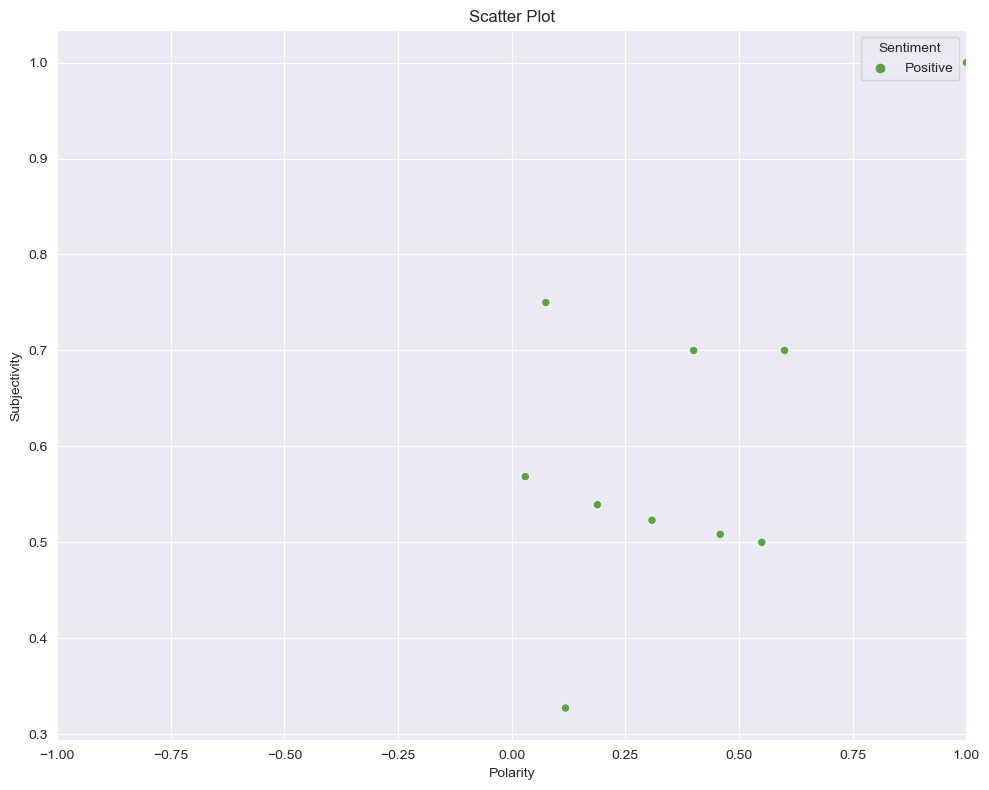

In [168]:
# Create scatter plot

sns.set_style('darkgrid')
plt.figure(figsize = (10,8))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=EchoSpeaker, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()